# Backpropagation and Automatic Differentiation

In many machine learning tasks, we use a technique called gradient descent to find the best parameters for our model. For example, in linear regression model, we are looking for the best parameters $M$ and $b$ such that the squared loss $\|y- b + AX\|$ is minimum, and the gradient descent will provide us a fast way to compute these best parameters (you saw a glimpse of this in the previous homework). This computation is done using dynamic programming (cf. Linear Algebra and Optimization for Machine Learning, Section 5.8.4 of Chapter 5). Dynamic programming is a technique from optimization that can be used to compute all types of path-centric functions in directed acyclic graphs.

The main challenge is in computing the gradient of the loss function with respect to the weights in a computational graph. Since the global function is in the form of composition of functions, we need to use the chain rule. However, a blind use of the chain rule is rather wasteful because many of the expressions in CG are identical, and we would be repeatedly computing the same derivative. We can avoid repeating the differentiation of these terms by using the topology of the computational graph itself to store intermediate results (by working backwards starting from output nodes to compute derivatives). This algorithm is referred to as __backpropagation__. The backpropagation algorithm (Kelley, 1960; Bryson, 1961; Dreyfus, 1962; Rumelhart et al., 1986) is an effective method to figure out how the error of a function changes based on the model's parameters.

## Backpropagation in a Deep Network Model

Recall that in neural networks with multiple layers, the objective function $F$ is a composition of many-level functions:

$$
F = f_k \circ f_{k-1} \circ \dots \circ f_1.
$$

We are looking for the following equation:

$$
y = f_k \circ f_{k-1} \circ \dots \circ f_1(x).
$$

Here, $x$ represents the input (e.g., images of handwriting digits), $y$ represents the observations (e.g., class labels such as 1, 2, etc.), and $f_i$ is a function in the form of $\sigma(A_{i-1}x_{i-1} + b_i)$, where $i = 1,\dots K$. Each $f_i$ has two parameters: $A_i$ and $b_i$.

The following picture is a computational graph for $F$ (if th image is not loaded, check out $[3, page 160$). 

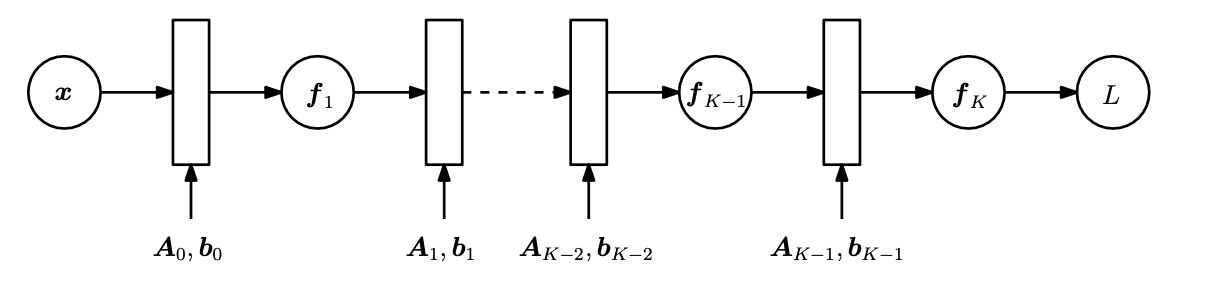

Recall that we are interested in finding $A_j,b_j$ for $j = 0,...,k−1$, such that the squared loss

$$
L(p) =\|y − F(p, x)\|_2
$$
is minimized, where $P = \left[A_0, b_0, . . . , A_{k−1}, b_{k−1}\right]^T$ is the vector that contains all parameters.

To that end, we need the gradient of a loss function $L$ with respect to the vector $P$ (all parameters). Let us find the partial derivatives of L with respect to the parameters $P_j =(A_j,b_j)$ of each layer $j = 0,...,k −1$ using the chain rule:
$$
\frac{\partial L}{\partial P_{k-1}} = \frac{\partial L}{\partial f_k} \color{blue}{\frac{{\partial f_k}}{\partial P_{k-1}}}
$$

$$
\frac{\partial L}{\partial P_{k-2}} = \frac{\partial L}{\partial f_{k}} \color{red}{\frac{\partial f_k}{\partial f_{k-1}}} \color{blue}{\frac{\partial f_{k-1}}{\partial P_{k-2}}}
$$


$$
\frac{\partial L}{\partial P_{k-3}} = \frac{\partial L}{\partial f_{k}} \color{red}{ \frac{\partial f_k}{\partial f_{k-1}}\frac{\partial f_{k-1}}{\partial f_{k-2}}}\color{blue}{\frac{\partial f_{k-2}}{\partial P_{k-3}}}
$$

and in general


$$
\frac{\partial L}{\partial P_{i}} = \frac{\partial L}{\partial f_{k}} \color{red}{ \frac{\partial f_k}{\partial f_{k-1}} \dots\frac{\partial f_{i+2}}{\partial f_{i+1}}}\color{blue}{\frac{\partial f_{i+1}}{\partial P_{i}}}
$$


The $\color{red}{\text{red}}$ terms are partial derivatives of the output of a layer with respect to its inputs, whereas the $\color{blue}{\text{blue}}$ terms are partial derivatives of the output of a layer with respect to its parameters. Assuming, we have already computed the partial derivatives $\frac{\partial L}{\partial P_{i+1}}$, then most of the computation can be reused to compute $\frac{\partial L}{\partial P_{i}}$. The next figure visualizes how the gradients are passed backward through the network.

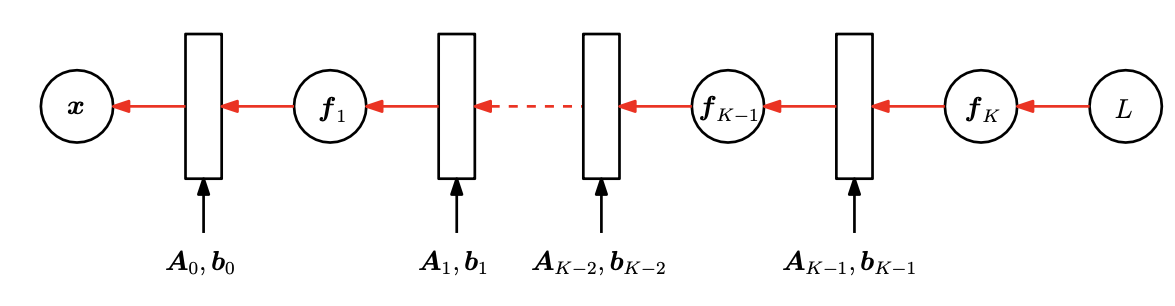

__Example 1:__ Consider the function 


$$
f(x) = \sqrt{x^2 + \exp(x^2)} + \cos\left(x^2 + \exp(x^2)\right).
$$


1. Design a computational graph with $f$ being the global function. 

2. compute the derivatives of the intermediate variables with respect to their corresponding inputs.

3. compute$\frac{d f} {d x}$ by working backward from the output.

If we wanted to compute the gradient directly, we could start by defining $g(x) = x^2 + \exp(x^2)$. Then

$$
\frac{df}{dx} = \frac{df}{dg} \frac{dg}{dx} = \left( \frac{1}{2\sqrt{g(x)}} - \sin \left( g(x)\right) \right) (2x + 2x\exp(x^2))
$$

$$
= 2x \left( \frac{1}{2\sqrt{x^2 + \exp(x^2)}} - \sin \left( x^2 + \exp(x^2)\right) \right)  (1 + \exp(x^2))
$$

Which is significantly more complicated than what we obtained in 3.

### (Further Reading) Automatic Differentiation

The  backpropagation is a special case of a general technique in numerical analysis called automatic differentiation. We think of automatic differentation as a set of techniques to numerically (in contrast to symbolically) evaluate the exact (up to machine precision) gradient of a function by working with intermediate variables and applying the chain rule. Automatic differentiation applies a series of elementary arithmetic operations, e.g., addition and multiplication and elementary functions, e.g., sin, cos, exp, log. By applying the chain rule to these operations, the gradient of quite complicated functions can be computed automatically. Automatic differentiation applies to general computer programs and has forward and reverse modes.[Baydin et al. (2018)](https://www.jmlr.org/papers/volume18/17-468/17-468.pdf) give a great overview of automatic differentiation in machine learning.

References:

1. Gilbert Strang, "Linear Algebra and Learning from Data," 2019. [Online] Available at: math.mit.edu/learningfromdata.

2. Charu C. Aggarwal, "Linear Algebra and Optimization for Machine Learning," 2019.

3. M. P. Deisenroth, A. A. Faisal, C. S. Ong, "Mathematics for Machine Learning," 2020. [Online] Available at: https://mml-book.com.